# F. (RM_null)_SMOTE_ Tuning parameters of GB

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [3]:
#load the files

X_train = pd.read_csv('../data/x_y_data/rm_null/X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/rm_null/y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/rm_null/X_test.csv')
y_test = pd.read_csv('../data/x_y_data/rm_null/y_test.csv')
data = pd.read_csv('../data/cleaned_data/rm_null_cleaned_data.csv')


In [4]:
X_train.shape

(7494, 18)

In [5]:
#set the high-parameter

param_grid = {
    'loss': ['log_loss', 'exponential'],
    'n_estimators': [70, 100, 125],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 5],
    'max_depth':[None,3,5],
    'max_features': ['sqrt', 'log2'] # round(sqrt(#cols))
    }

gb = GradientBoostingClassifier(random_state=12345)

grid_search = GridSearchCV(gb, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 2/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 2/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.967) total time=   8.4s
[CV 5/5; 3/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 5/5; 3/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.953) total time=  11.5s
[CV 3/5; 5/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 5/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_sp

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 1/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 4/5; 1/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.959) total time=   5.7s
[CV 1/5; 3/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 3/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.937) total time=  10.5s
[CV 4/5; 4/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 4/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 1/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 5/5; 1/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.955) total time=   5.8s
[CV 2/5; 3/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 2/5; 3/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.971) total time=  11.3s
[CV 1/5; 5/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 5/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_spli

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 1/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 2/5; 1/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.971) total time=   5.7s
[CV 5/5; 2/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 2/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.953) total time=   8.9s
[CV 3/5; 4/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 3/5; 4/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 2/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 2/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.937) total time=   7.7s
[CV 4/5; 3/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 4/5; 3/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.961) total time=  11.5s
[CV 2/5; 5/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 5/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_sp

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 1/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 3/5; 1/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.967) total time=   5.8s
[CV 3/5; 3/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 3/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.967) total time=  11.3s
[CV 5/5; 4/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 5/5; 4/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 2/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 2/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.973) total time=   8.5s
[CV 1/5; 4/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 1/5; 4/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.937) total time=  15.2s
[CV 4/5; 5/648] START criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/5; 5/648] END criterion=friedman_mse, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_spli

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 64/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 1/5; 64/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.875, test=0.834) total time=   0.7s
[CV 1/5; 65/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 65/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.895, test=0.843) total time=   1.1s
[CV 4/5; 66/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 4/5; 66/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estim

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 66/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 5/5; 66/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.892, test=0.878) total time=   1.3s
[CV 1/5; 69/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=125
[CV 1/5; 69/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=(train=0.903, test=0.843) total time=   1.4s
[CV 4/5; 70/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 4/5; 70/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_es

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 72/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=125
[CV 3/5; 72/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=125;, score=(train=0.889, test=0.880) total time=   1.4s
[CV 3/5; 74/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 3/5; 74/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.881, test=0.873) total time=   1.4s
[CV 1/5; 76/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70
[CV 1/5; 76/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_es

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 69/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=125
[CV 5/5; 69/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=(train=0.892, test=0.878) total time=   1.4s
[CV 1/5; 72/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=125
[CV 1/5; 72/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=125;, score=(train=0.902, test=0.845) total time=   1.4s
[CV 4/5; 73/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 4/5; 73/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_es

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 79/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=70
[CV 2/5; 79/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=(train=0.865, test=0.857) total time=   0.9s
[CV 3/5; 80/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 3/5; 80/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=0.881, test=0.873) total time=   1.4s
[CV 1/5; 82/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 1/5; 82/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_es

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 76/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70
[CV 2/5; 76/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=0.865, test=0.857) total time=   0.9s
[CV 3/5; 77/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 3/5; 77/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=(train=0.881, test=0.873) total time=   1.3s
[CV 1/5; 79/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=70
[CV 1/5; 79/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_esti

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 80/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 4/5; 80/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=0.880, test=0.883) total time=   1.4s
[CV 2/5; 82/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 2/5; 82/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=0.866, test=0.859) total time=   0.8s
[CV 3/5; 83/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 83/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_est

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 79/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=70
[CV 5/5; 79/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=(train=0.868, test=0.856) total time=   1.0s
[CV 3/5; 81/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125
[CV 3/5; 81/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125;, score=(train=0.890, test=0.885) total time=   1.5s
[CV 2/5; 83/648] START criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 83/648] END criterion=friedman_mse, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_e

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 136/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=0.923, test=0.904) total time=   1.5s
[CV 3/5; 138/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 138/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.960, test=0.937) total time=   2.5s
[CV 2/5; 140/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 140/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.948, test=0.927) total time=   1.8s
[CV 5/5; 141/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_fea

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 141/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=(train=0.954, test=0.941) total time=   2.3s
[CV 5/5; 143/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 143/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.944, test=0.921) total time=   2.2s
[CV 3/5; 145/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 3/5; 145/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.925, test=0.904) total time=   2.0s
[CV 4/5; 146/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_fe

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 140/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.950, test=0.925) total time=   1.9s
[CV 3/5; 142/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 3/5; 142/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=(train=0.925, test=0.908) total time=   1.4s
[CV 4/5; 143/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 4/5; 143/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.947, test=0.934) total time=   2.2s
[CV 2/5; 145/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 143/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.946, test=0.936) total time=   2.0s
[CV 5/5; 144/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=125
[CV 5/5; 144/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=0.955, test=0.933) total time=   3.5s
[CV 1/5; 147/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 1/5; 147/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.966, test=0.885) total time=   3.2s
[CV 4/5; 148/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 151/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=(train=0.928, test=0.869) total time=   1.2s
[CV 1/5; 152/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 152/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=0.947, test=0.879) total time=   1.9s
[CV 4/5; 153/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=125
[CV 4/5; 153/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=125;, score=(train=0.956, test=0.941) total time=   2.2s
[CV 5/5; 155/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, ma

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 152/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=0.945, test=0.935) total time=   1.9s
[CV 5/5; 153/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=125
[CV 5/5; 153/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=125;, score=(train=0.955, test=0.931) total time=   2.2s
[CV 1/5; 156/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 1/5; 156/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.962, test=0.884) total time=   2.1s
[CV 4/5; 157/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 151/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=(train=0.926, test=0.910) total time=   1.3s
[CV 4/5; 152/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 152/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=0.943, test=0.931) total time=   1.8s
[CV 2/5; 154/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 2/5; 154/648] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70;, score=(train=0.926, test=0.912) total time=   1.2s
[CV 3/5; 155/648] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_fe

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 206/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 206/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.960) total time=  14.4s
[CV 2/5; 208/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 2/5; 208/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.971) total time=   8.4s
[CV 1/5; 209/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 1/5; 209/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 208/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 3/5; 208/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.965) total time=   8.1s
[CV 2/5; 209/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 2/5; 209/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.973) total time=  11.4s
[CV 5/5; 210/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 5/5; 210/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_sa

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 217/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=0.861, test=0.852) total time=   0.7s
[CV 2/5; 218/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 218/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.876, test=0.870) total time=   1.0s
[CV 5/5; 218/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 218/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.882, test=0.865) total time=   1.0s
[CV 3/5; 219/648] START criterion=friedman_mse, loss=exponential, ma

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 213/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=125
[CV 4/5; 213/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=125;, score=(train=1.000, test=0.965) total time=  15.5s
[CV 5/5; 215/648] START criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 5/5; 215/648] END criterion=friedman_mse, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.958) total time=  10.8s
[CV 3/5; 218/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 218/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samp

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 220/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 220/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=0.860, test=0.860) total time=   0.8s
[CV 4/5; 221/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/5; 221/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.876, test=0.876) total time=   1.2s
[CV 4/5; 222/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=125
[CV 4/5; 222/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 224/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.880, test=0.877) total time=   1.2s
[CV 4/5; 225/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125
[CV 4/5; 225/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=0.883, test=0.889) total time=   1.2s
[CV 2/5; 227/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 227/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.879, test=0.871) total time=   1.0s
[CV 5/5; 228/648] START criterion=friedman_mse, loss=exponential

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 232/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=(train=0.861, test=0.857) total time=   0.8s
[CV 3/5; 233/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 233/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=0.878, test=0.876) total time=   1.2s
[CV 1/5; 235/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 1/5; 235/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70;, score=(train=0.873, test=0.832) total time=   0.8s
[CV 5/5; 235/648] START criterion=friedman_mse, loss=exponential, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 234/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=125;, score=(train=0.887, test=0.885) total time=   1.5s
[CV 2/5; 236/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 2/5; 236/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.877, test=0.870) total time=   1.2s
[CV 5/5; 237/648] START criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 5/5; 237/648] END criterion=friedman_mse, loss=exponential, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.890, test=0.883) total time=   1.6s
[CV 1/5; 240/648] START criterion=friedman_mse, loss=exponential, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 271/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 3/5; 271/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=0.917, test=0.899) total time=   1.1s
[CV 1/5; 273/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 273/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.960, test=0.887) total time=   2.0s
[CV 4/5; 274/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 274/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_s

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 279/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=0.953, test=0.937) total time=   2.1s
[CV 2/5; 281/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 281/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.942, test=0.931) total time=   1.6s
[CV 5/5; 282/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 5/5; 282/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.952, test=0.929) total time=   2.0s
[CV 1/5; 285/648] START criterion=friedman_mse, loss=exponential, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 288/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=125;, score=(train=0.952, test=0.941) total time=   2.1s
[CV 5/5; 290/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 5/5; 290/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.940, test=0.919) total time=   1.6s
[CV 3/5; 292/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70
[CV 3/5; 292/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=0.919, test=0.907) total time=   1.2s
[CV 4/5; 293/648] START criterion=friedman_mse, loss=exponential, ma

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 279/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125
[CV 1/5; 279/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=0.961, test=0.891) total time=   2.1s
[CV 4/5; 280/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 4/5; 280/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.922, test=0.914) total time=   1.1s
[CV 2/5; 282/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 2/5; 282/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, mi

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 280/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.922, test=0.899) total time=   1.1s
[CV 3/5; 282/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 3/5; 282/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.952, test=0.929) total time=   2.0s
[CV 2/5; 284/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 2/5; 284/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=0.941, test=0.929) total time=   1.7s
[CV 5/5; 285/648] START criterion=friedman_mse, loss=exponential, ma

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 294/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=125;, score=(train=0.950, test=0.938) total time=   2.0s
[CV 1/5; 296/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 1/5; 296/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=0.948, test=0.875) total time=   1.6s
[CV 4/5; 297/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125
[CV 4/5; 297/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125;, score=(train=0.952, test=0.947) total time=   2.1s
[CV 1/5; 300/648] START criterion=friedman_mse, loss=exponentia

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 307/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.919, test=0.895) total time=   1.3s
[CV 4/5; 308/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 4/5; 308/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.940, test=0.933) total time=   1.9s
[CV 2/5; 310/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 2/5; 310/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=(train=0.919, test=0.906) total time=   1.1s
[CV 3/5; 311/648] START criterion=friedman_mse, loss=exponential, max_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 302/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.939, test=0.930) total time=   1.6s
[CV 4/5; 303/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=125
[CV 4/5; 303/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=(train=0.952, test=0.943) total time=   2.1s
[CV 1/5; 306/648] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=125
[CV 1/5; 306/648] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=0.961, test=0.891) total time=   2.2s
[CV 4/5; 307/648] START criterion=friedman_mse, loss=exponential,

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 351/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125;, score=(train=1.000, test=0.965) total time=  12.4s
[CV 5/5; 353/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 353/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.959) total time=   9.7s
[CV 3/5; 355/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 3/5; 355/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.963) total time=  18.7s
[CV 1/5; 357/648] START criterion=squared_error, loss=log_loss,

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 338/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.968) total time=  20.5s
[CV 1/5; 340/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 1/5; 340/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=(train=1.000, test=0.939) total time=   8.9s
[CV 4/5; 340/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 4/5; 340/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=(train=1.000, test=0.959) total time=   9.4s
[CV 5/5; 341/648] START criterion=squared_error, loss=log_loss

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 351/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=125;, score=(train=1.000, test=0.967) total time=  12.6s
[CV 1/5; 354/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 354/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.937) total time=  11.2s
[CV 4/5; 355/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 355/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.966) total time=  19.5s
[CV 2/5; 357/648] START criterion=squared_error, loss=log_loss,

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 354/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.970) total time=  12.3s
[CV 5/5; 355/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 5/5; 355/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.959) total time=  19.6s
[CV 3/5; 357/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=125
[CV 3/5; 357/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=125;, score=(train=1.000, test=0.965) total time=  32.1s
[CV 4/5; 359/648] START criterion=squared_error, loss=log_loss, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 358/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=(train=1.000, test=0.939) total time=  10.6s
[CV 4/5; 358/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 4/5; 358/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=(train=1.000, test=0.963) total time=  11.1s
[CV 5/5; 359/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 359/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.961) total time=  15.0s
[CV 3/5; 361/648] START criterion=squared_error, loss=log_lo

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 368/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.962) total time=  14.0s
[CV 2/5; 370/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 2/5; 370/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.969) total time=   6.5s
[CV 4/5; 370/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 4/5; 370/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.965) total time=   6.8s
[CV 5/5; 371/648] START criterion=squared_error, loss=log_loss, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 377/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.964) total time=  11.0s
[CV 2/5; 379/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 2/5; 379/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=0.866, test=0.859) total time=   0.7s
[CV 4/5; 379/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 4/5; 379/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=(train=0.862, test=0.865) total time=   0.7s
[CV 1/5; 380/648] START criterion=squared_error, loss=log_loss, max_depth=3, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 373/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.939) total time=   6.6s
[CV 4/5; 373/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70
[CV 4/5; 373/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.965) total time=   7.9s
[CV 2/5; 375/648] START criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=125
[CV 2/5; 375/648] END criterion=squared_error, loss=log_loss, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=125;, score=(train=1.000, test=0.975) total time=  12.0s
[CV 1/5; 377/648] START criterion=squared_error, loss=log_loss, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 414/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=125
[CV 3/5; 414/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=0.889, test=0.879) total time=   1.5s
[CV 1/5; 416/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 416/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.895, test=0.843) total time=   1.2s
[CV 4/5; 417/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 4/5; 417/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 418/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 1/5; 418/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=(train=0.875, test=0.834) total time=   0.9s
[CV 1/5; 419/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 419/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=0.895, test=0.843) total time=   1.6s
[CV 1/5; 421/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 1/5; 421/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_spli

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 426/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.894, test=0.882) total time=   1.7s
[CV 1/5; 429/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=125
[CV 1/5; 429/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=125;, score=(train=0.903, test=0.843) total time=   1.9s
[CV 4/5; 430/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70
[CV 4/5; 430/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=(train=0.861, test=0.863) total time=   0.8s
[CV 2/5; 432/648] START criterion=squared_error, loss=log_loss, max_depth=3, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 427/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=0.866, test=0.862) total time=   1.0s
[CV 4/5; 428/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 4/5; 428/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=(train=0.880, test=0.883) total time=   1.6s
[CV 2/5; 430/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70
[CV 2/5; 430/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=(train=0.865, test=0.857) total time=   0.9s
[CV 2/5; 431/648] START criterion=squared_error, loss=log_loss, max_depth=3, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 426/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125
[CV 2/5; 426/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.890, test=0.884) total time=   1.8s
[CV 5/5; 427/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70
[CV 5/5; 427/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70;, score=(train=0.868, test=0.856) total time=   1.0s
[CV 3/5; 429/648] START criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=125
[CV 3/5; 429/648] END criterion=squared_error, loss=log_loss, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_spli

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 439/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=(train=0.927, test=0.913) total time=   1.1s
[CV 2/5; 440/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 440/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=0.946, test=0.936) total time=   1.6s
[CV 5/5; 441/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125
[CV 5/5; 441/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=125;, score=(train=0.954, test=0.927) total time=   2.4s
[CV 1/5; 444/648] START criterion=squared_error, loss=log_loss, max_depth

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 455/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=(train=0.943, test=0.917) total time=   2.3s
[CV 1/5; 457/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=70
[CV 1/5; 457/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=70;, score=(train=0.930, test=0.869) total time=   1.6s
[CV 1/5; 458/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 1/5; 458/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=(train=0.951, test=0.877) total time=   2.0s
[CV 4/5; 459/648] START criterion=squared_error, loss=log_loss, max_depth=5

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 442/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.931, test=0.865) total time=   1.4s
[CV 5/5; 442/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 5/5; 442/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=0.924, test=0.907) total time=   1.2s
[CV 3/5; 444/648] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 3/5; 444/648] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=0.959, test=0.929) total time=   2.2s
[CV 2/5; 446/648] START criterion=squared_error, loss=log_loss, max_depth=5, max

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 488/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 488/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.965) total time=  11.9s
[CV 1/5; 490/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 1/5; 490/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.937) total time=  15.6s
[CV 4/5; 491/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/5; 491/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 497/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.962) total time=  25.4s
[CV 2/5; 499/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 2/5; 499/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.968) total time=  20.3s
[CV 1/5; 500/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 500/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.939) total time=  23.2s
[CV 4/5; 501/648] START criterion=squared_error, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 499/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 3/5; 499/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.967) total time=  20.0s
[CV 2/5; 500/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 2/5; 500/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=1.000, test=0.972) total time=  23.2s
[CV 5/5; 501/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=125
[CV 5/5; 501/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 515/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 515/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.957) total time=  12.3s
[CV 3/5; 517/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 3/5; 517/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.963) total time=  15.5s
[CV 1/5; 519/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=125
[CV 1/5; 519/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 496/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=(train=1.000, test=0.965) total time=  17.5s
[CV 1/5; 498/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 1/5; 498/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.945) total time=  32.2s
[CV 4/5; 499/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 4/5; 499/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=(train=1.000, test=0.961) total time=  19.4s
[CV 5/5; 500/648] START criterion=squared_error, l

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 528/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=125
[CV 3/5; 528/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=125;, score=(train=1.000, test=0.970) total time=  27.5s
[CV 4/5; 530/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 530/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=(train=1.000, test=0.967) total time=  14.0s
[CV 2/5; 532/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70
[CV 2/5; 532/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=log

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 515/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 515/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=1.000, test=0.965) total time=  12.4s
[CV 5/5; 516/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 5/5; 516/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=1.000, test=0.956) total time=  14.1s
[CV 3/5; 518/648] START criterion=squared_error, loss=exponential, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 518/648] END criterion=squared_error, loss=exponential, max_depth=None, max_features=log2

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

{'criterion': 'squared_error',
 'loss': 'exponential',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 125}

[CV 1/5; 571/648] START criterion=squared_error, loss=exponential, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 1/5; 571/648] END criterion=squared_error, loss=exponential, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=(train=0.874, test=0.830) total time=   0.7s
[CV 1/5; 572/648] START criterion=squared_error, loss=exponential, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 572/648] END criterion=squared_error, loss=exponential, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.892, test=0.841) total time=   1.0s
[CV 4/5; 573/648] START criterion=squared_error, loss=exponential, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=125
[CV 4/5; 573/648] END criterion=squared_error, loss=exponential, max_depth=3, max_features=log2, min_samples_leaf=1

####  Cross validation socre - Accuracy-

In [6]:
gb1= GradientBoostingClassifier(criterion = 'squared_error',
 loss= 'exponential',
 max_depth= None,
 max_features= 'sqrt',
 min_samples_leaf= 5,
 min_samples_split= 2,
 n_estimators= 125)

results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(gb1, X_train, y_train, cv=kfold, scoring="accuracy")

results.append(cv_results)
    
msg = f" GB: {cv_results.mean()} ({cv_results.std()})"
print(msg)

 GB: 0.9577100133511347 (0.025000961372711024)


In [7]:
names = ["accuracy"]
results_dict = {name: result for name, result in zip(names, results)}

# Create the DataFrame using the dictionary
score = pd.DataFrame(results_dict)

# Print the DataFrame
display(score)

,accuracy
0,0.934667
1,0.942667
2,0.929333
3,0.945333
4,0.918558
5,0.969292
6,0.989319
7,0.981308
8,0.982644
9,0.983979


In [8]:
#save the score
score.to_csv('../data/score/rm_null/after_tuning_parameter/GB/gb_cross_val_accuracy.csv', index=False)

In [9]:
#save the model
gb1.fit(X_train, y_train)

filename = "../models/rm_null_SMOTE_gb.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(gb1,file)

#### Cross validation socre - Recall-

In [10]:
results2 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results2 = cross_val_score(gb1, X_train, y_train, cv=kfold, scoring="recall")

results2.append(cv_results2)
    
msg2 = f" GB: {cv_results2.mean()} ({cv_results2.std()})"
print(msg2)

 GB: 0.8753411839197851 (0.12579453337923177)


In [11]:
names2 = ["recall"]
results_dict2 = {name2: result2 for name2, result2 in zip(names2, results2)}

# Create the DataFrame using the dictionary
score2 = pd.DataFrame(results_dict2)

# Print the DataFrame
display(score2)

,recall
0,0.653846
1,0.871795
2,0.676471
3,0.857143
4,0.774194
5,0.988055
6,0.985314
7,0.983979
8,0.981308
9,0.981308


In [12]:
score2.to_csv('../data/score/rm_null/after_tuning_parameter/GB/gb_cross_val_recall.csv', index=False)

#### Cross validation socre -Precision-

In [13]:
results3 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results3 = cross_val_score(gb1, X_train, y_train, cv=kfold, scoring="precision")

results3.append(cv_results3)
    
msg3 = f" GB: {cv_results3.mean()} ({cv_results3.std()})"
print(msg3)

 GB: 0.6787270506260341 (0.3215460664121694)


In [14]:
names3 = ["precision"]
results_dict3 = {name3: result3 for name3, result3 in zip(names3, results3)}

# Create the DataFrame using the dictionary
score3 = pd.DataFrame(results_dict3)

# Print the DataFrame
display(score3)

,precision
0,0.271186
1,0.455882
2,0.322581
3,0.442857
4,0.315068
5,0.979695
6,1.000000
7,1.000000
8,1.000000
9,1.000000


In [15]:
score3.to_csv('../data/score/rm_null/after_tuning_parameter/GB/gb_cross_val_precision.csv', index=False)

#### Cross validation socre -F1-

In [16]:
results4 = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results4 = cross_val_score(gb1, X_train, y_train, cv=kfold, scoring="f1")

results4.append(cv_results4)
    
msg4 = f" GB: {cv_results4.mean()} ({cv_results4.std()})"
print(msg4)

 GB: 0.7475331968927524 (0.24858142263277636)


In [17]:
names4 = ["f1"]
results_dict4 = {name4: result4 for name4, result4 in zip(names4, results4)}

# Create the DataFrame using the dictionary
score4 = pd.DataFrame(results_dict4)

# Print the DataFrame
display(score4)

,f1
0,0.419753
1,0.634615
2,0.479167
3,0.555556
4,0.438095
5,0.983857
6,0.993956
7,0.990566
8,0.991246
9,0.988521


In [18]:
score4.to_csv('../data/score/rm_null/after_tuning_parameter/GB/gb_cross_val_f1.csv', index=False)

### Variable Importance 

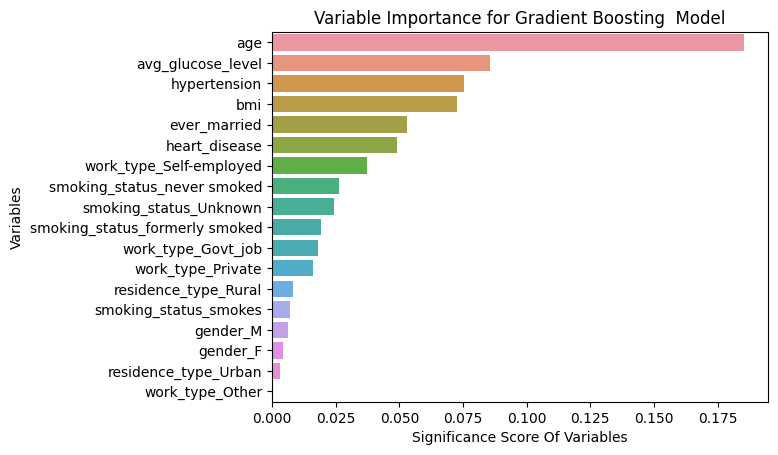

In [19]:
X_train2 = pd.read_csv('../data/x_y_data/rm_null/X_resampled.csv')
y_train2 = pd.read_csv('../data/x_y_data/rm_null/y_resampled.csv')


gb_tuned = gb1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(gb_tuned, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Gradient Boosting  Model")
plt.show()


#####  The level of 'age' is very high, compared to 'KNN'

In [20]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df

,0
age,0.185495
avg_glucose_level,0.085615
hypertension,0.075487
bmi,0.072471
ever_married,0.052829
heart_disease,0.048959
work_type_Self-employed,0.037363
smoking_status_never smoked,0.026475
smoking_status_Unknown,0.024153
smoking_status_formerly smoked,0.019162


In [21]:
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df.head(2)

,Significance Score
age,0.185495
avg_glucose_level,0.085615


In [22]:
feature_importances_df.to_csv('../data/score/rm_null/Significant_Score/GB_Significance_Score.csv', index=False)

### the classification report

In [23]:
from sklearn.metrics import confusion_matrix


y_pred = gb1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[903,  36],
       [ 36,   4]])

In [24]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    939
1     40
Name: count, dtype: int64

In [25]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

stroke
0         939
1          40
Name: count, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = gb1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.926456
1,Precision,0.100000
2,Recall,0.100000
3,F1-Score,0.100000
4,Kappa,0.061661


In [27]:
metrics_df.to_csv('../data/metrics/rm_null/gb_metrics.csv', index=False)